In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [2]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the dataset
df = pd.read_csv('ChurnPrediction.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# dropping unnecessary column customerID
df.drop(columns=['customerID'], inplace=True)

In [6]:
# convert target Churn to binary
df["Churn"] = df["Churn"].map({"Yes":1, "No":0})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
# convert TotalCharges to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].dtype

dtype('float64')

In [9]:
df.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7032.000000,7043.000000
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,NaN
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,NaN
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,NaN
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,0.265370
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.771362,0.441561
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,0.000000
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.450000,0.000000
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,0.000000
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3794.737500,1.000000


In [10]:
# check null values
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [12]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

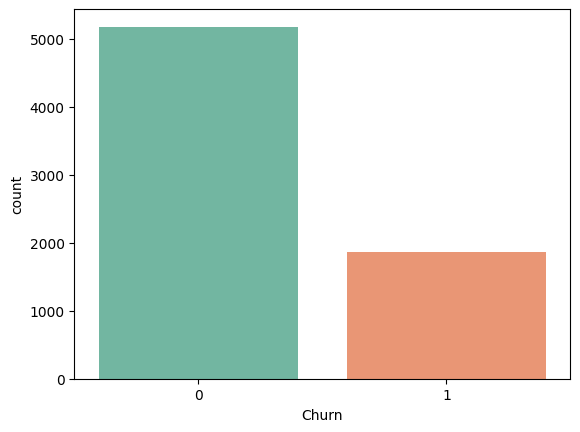

In [13]:
sns.countplot(data=df, x='Churn', palette='Set2')
plt.show()

In [14]:
# define features and target
X = df.drop(columns=['Churn'])
y = df['Churn']

In [15]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 19), (1409, 19), (5634,), (1409,))

In [17]:
# scale numeric features
num_cols = X_train.select_dtypes(include=["int64","float64"]).columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [18]:
# one hot encode categorical features
cat_cols = X_train.select_dtypes(include=["object"]).columns
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test  = pd.get_dummies(X_test,  columns=cat_cols, drop_first=True)
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

In [19]:
# apply SMOTE on the training set
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [20]:
print("Before SMOTE:")
y_train.value_counts()

Before SMOTE:


Churn
0    4139
1    1495
Name: count, dtype: int64

In [21]:
print("After SMOTE:")
y_train_res.value_counts()

After SMOTE:


Churn
0    4139
1    4139
Name: count, dtype: int64

In [22]:
X_train_res.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.441773,0.102371,-0.521976,-0.263289,True,False,False,False,True,False,...,False,True,False,True,False,False,False,False,True,False
1,-0.441773,-0.711743,0.337478,-0.504814,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,-0.441773,-0.793155,-0.809013,-0.751213,True,True,True,False,True,False,...,False,False,False,False,False,True,False,False,False,True
3,-0.441773,-0.263980,0.284384,-0.173699,False,True,False,True,False,False,...,False,True,False,True,False,True,True,True,False,False
4,-0.441773,-1.281624,-0.676279,-0.990851,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [23]:
y_train_res

0       0
1       0
2       0
3       0
4       0
       ..
8273    1
8274    1
8275    1
8276    1
8277    1
Name: Churn, Length: 8278, dtype: int64

In [24]:
# convert to float32
X_train_res = X_train.astype("float32")
X_test  = X_test.astype("float32")
y_train_res = y_train.astype("float32")
y_test  = y_test.astype("float32")

In [25]:
# define the ANN model

input_dim = X_train_res.shape[1]

model = Sequential()
model.add(Dense(units=32, input_shape=(input_dim,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [28]:
# apply early stopping to prevent overfitting
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [29]:
history = model.fit(X_train_res, y_train_res, validation_split=0.2, epochs=100, batch_size=32, callbacks=[es], verbose=1)

Epoch 1/100
141/141 [==============================] - 1s 7ms/step - loss: 0.5362 - accuracy: 0.7153 - val_loss: 0.4731 - val_accuracy: 0.7675
Epoch 2/100
141/141 [==============================] - 1s 5ms/step - loss: 0.4643 - accuracy: 0.7706 - val_loss: 0.4531 - val_accuracy: 0.7897
Epoch 3/100
141/141 [==============================] - 1s 5ms/step - loss: 0.4525 - accuracy: 0.7843 - val_loss: 0.4466 - val_accuracy: 0.7924
Epoch 4/100
141/141 [==============================] - 1s 6ms/step - loss: 0.4398 - accuracy: 0.7857 - val_loss: 0.4449 - val_accuracy: 0.7835
Epoch 5/100
141/141 [==============================] - 1s 6ms/step - loss: 0.4356 - accuracy: 0.7910 - val_loss: 0.4408 - val_accuracy: 0.7897
Epoch 6/100
141/141 [==============================] - 1s 6ms/step - loss: 0.4282 - accuracy: 0.7988 - val_loss: 0.4392 - val_accuracy: 0.7888
Epoch 7/100
141/141 [==============================] - 1s 6ms/step - loss: 0.4248 - accuracy: 0.7972 - val_loss: 0.4386 - val_accuracy: 0.7933

In [30]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

45/45 [==============================] - 0s 4ms/step - loss: 0.4205 - accuracy: 0.7991
Test accuracy: 0.7991483211517334
Test loss: 0.4204619228839874


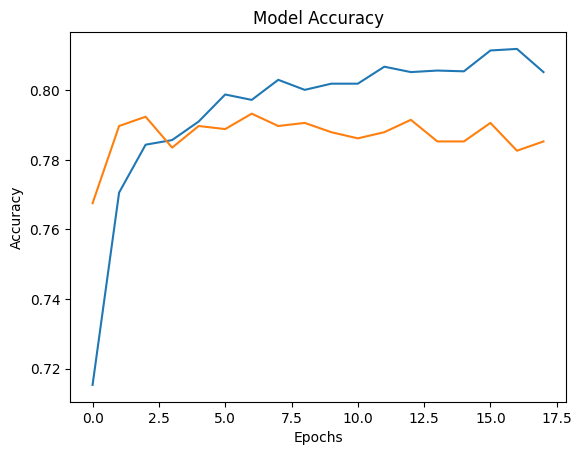

In [31]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

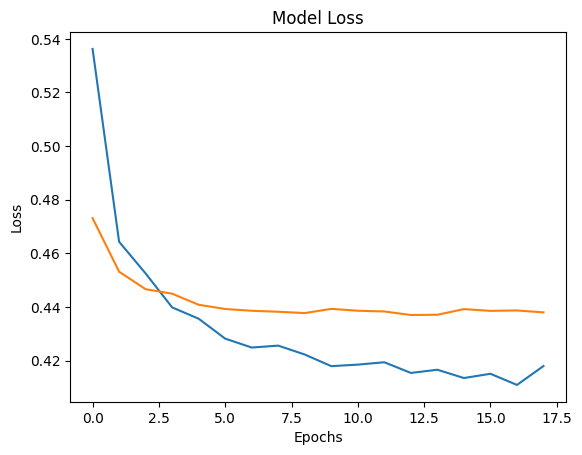

In [32]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

In [33]:
# get predictions (probabilities) and then convert to binary (0/1)
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs>0.5).astype('int')

45/45 [==============================] - 0s 2ms/step


In [34]:
confusion_matrix(y_test, y_pred)

array([[931, 104],
       [179, 195]], dtype=int64)

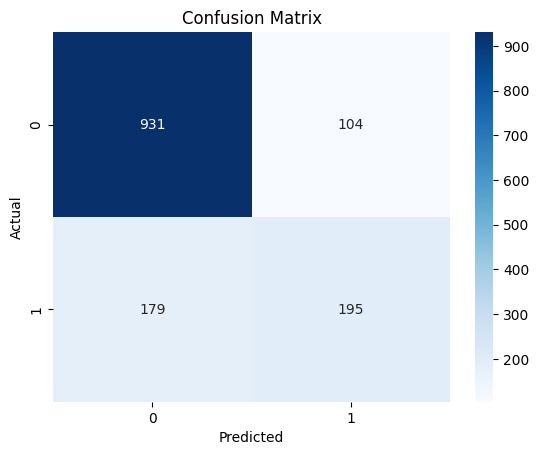

In [35]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1035
         1.0       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

